# Módulo 2: HTML: Requests y BeautifulSoup
## Parsing Pagina12

En este módulo veremos cómo utilizar las bibliotecas `requests` y `bs4` para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
p12.status_code

200

In [5]:
#p12.content

Muchas veces la respuesta a la solicitud puede ser algo que no sea un texto: una imagen, un archivo de audio, un video, etc.

In [6]:
#p12.text

Analicemos otros elementos de la respuesta

In [7]:
p12.headers

{'Date': 'Thu, 15 Dec 2022 17:34:35 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'x-etag': 'W/"6d86b-Xc/YDDK6FxKZGfq7phdZPMNaXEI"', 'x-backend': 'frontend', 'x-type': 'Dynamic URI', 'x-backend-ttl': '120.000', 'age': '72', 'grace': '86400.000 none', 'ttl': '47.095', 'x-instance': 'cache-front-prod-varnish-86654b9966-vld8w', 'x-restarts': '0', 'x-cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Server-Timing': 'cf-q-config;dur=5.0000016926788e-06', 'Server': 'cloudflare', 'CF-RAY': '77a0ee5188c9a2ef-CDG', 'Content-Encoding': 'gzip'}

In [8]:
p12.request.headers

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

El contenido de la request que acabamos de hacer está avisando que estamos utilizando la biblioteca requests para python y que no es un navegador convencional. Se puede modificar

## Clase 4
Ya obtuvimos el código HTML de la página. En esta clase veremos cómo extraer de él la información deseada.

In [9]:
from bs4 import BeautifulSoup

In [10]:
s = BeautifulSoup(p12.text, 'lxml')

In [11]:
type(s)

bs4.BeautifulSoup

In [12]:
#print(s.prettify())

Primer ejercicio: obtener un listado de links a las distintas secciones del diario.<br>
DOM: estructura jerárquica, html<br>
Usar el inspector de elementos para ver dónde se encuentra la información. Ojo cuando la página es responsive

In [13]:
secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

In [14]:
seccion = secciones[0]

In [15]:
seccion.a # = seccion.find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [16]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [17]:
seccion.a.get_text()

'El país'

In [18]:
link_secciones = [seccion.a.get("href") for seccion in secciones]
link_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo']

In [19]:
sec = requests.get(link_secciones[0])
sec

<Response [200]>

In [20]:
s_seccion = BeautifulSoup(sec.text, "html.parser")

In [21]:
sub_secciones = s_seccion.find('div', attrs={'class':'main-content'}).find_all(['h2','h3','h4'])
sub_secciones

[<h2 class="h1 title-list"><a href="/508189-la-corte-suprema-hizo-otro-aporte-a-la-persecucion-de-milagr">La Corte Suprema hizo otro aporte a la persecución de Milagro Sala</a></h2>,
 <h3 class="h2 title-list featured-article"><a href="/508183-cristina-kirchner-volvio-a-desenmascarar-el-lawfare-con-un-v">Cristina Kirchner volvió a desenmascarar el lawfare con un video de Luis Arce</a></h3>,
 <h3 class="h2 title-list featured-article"><a href="/508175-macri-confirmo-que-estara-en-la-final-del-mundial">Macri confirmó que estará en la final del Mundial</a></h3>,
 <h4 class="h2 is-display-inline title-list"><a class="" href="/508172-diputados-funcionarios-y-especialistas-en-salud-evaluaron-pr">Diputados: funcionarios y especialistas en salud evaluaron proyecto sobre “seguridad del paciente” y “evaluación de tecnologías sanitarias”</a></h4>,
 <h4 class="h2 is-display-inline title-list"><a class="" href="/508135-jorge-capitanich-decidio-desdoblar-las-elecciones-2023-en-ch">Jorge Capitanich d

In [22]:
link_sub_secciones = ["https://www.pagina12.com.ar"+seccion.a.get("href") for seccion in sub_secciones]
link_sub_secciones

['https://www.pagina12.com.ar/508189-la-corte-suprema-hizo-otro-aporte-a-la-persecucion-de-milagr',
 'https://www.pagina12.com.ar/508183-cristina-kirchner-volvio-a-desenmascarar-el-lawfare-con-un-v',
 'https://www.pagina12.com.ar/508175-macri-confirmo-que-estara-en-la-final-del-mundial',
 'https://www.pagina12.com.ar/508172-diputados-funcionarios-y-especialistas-en-salud-evaluaron-pr',
 'https://www.pagina12.com.ar/508135-jorge-capitanich-decidio-desdoblar-las-elecciones-2023-en-ch',
 'https://www.pagina12.com.ar/508129-no-hay-decision-tomada-lo-que-dicen-en-el-gobierno-sobre-un-',
 'https://www.pagina12.com.ar/508180-moron-confirmo-un-bono-de-45-mil-pesos-para-el-personal-muni',
 'https://www.pagina12.com.ar/508040-cumbre-de-intendentes-peronistas-y-criticas-del-kirchnerismo',
 'https://www.pagina12.com.ar/508043-por-una-navidad-sin-hambre',
 'https://www.pagina12.com.ar/507812-alberto-fernandez-hizo-un-balance-de-sus-tres-anos-de-gestio',
 'https://www.pagina12.com.ar/508044-la-justi

In [23]:
#print(s_seccion.prettify())

## Reto Crear funcion que recibe una seccion y devuelve todos sus links

In [24]:
def notices(Soup):
    """Returns the links of the seccion we specify as a list"""
    sec = requests.get(Soup)
    s_seccion = BeautifulSoup(sec.text, "html.parser")
    sub_secciones = s_seccion.find('div', attrs={'class':'main-content'}).find_all(['h2','h3','h4'])
    link_sub_secciones = ["https://www.pagina12.com.ar"+seccion.a.get("href") for seccion in sub_secciones]

    return link_sub_secciones

In [122]:
links_notas = notices(link_secciones[0])

## Clase 6
En esta clase te voy a hablar un poco del manejo de errores. Para eso vamos a tomar como ejemplo uno de los links que obtuvimos con la función que tenías que armar en la clase anterior.

Código de error != 200

In [26]:
r = requests.get(link_secciones[0])
if r.status_code == 200:
    # Procesamos la respuesta
    print('procesamos..')
else:
     # Informar el error
    print('informamos...')

procesamos..


In [27]:
url_nota = link_secciones[0]
print(url_nota)

https://www.pagina12.com.ar/secciones/el-pais


Supongamos que el link a la nota está mal cargado, o que sacaron la nota del sitio, o que directamente no está funcionando la web de página 12.

In [28]:
url_mala = url_nota.replace('2','3')
print(url_mala)

https://www.pagina13.com.ar/secciones/el-pais


Esto lo hacemos sólo para simular una URL mal cargada o un sevidor caído

In [29]:
#r = requests.get(url_mala)
if r.status_code == 200:
    # Procesamos la respuesta
    print('procesamos..')
else:
     # Informar el error
    print('informamos status code != 200')

procesamos..


Obtuvimos un error que interrumpió la ejecución del código. No llegamos a imprimir el status code. Muchas veces estos errores son inevitables y no dependen de nosotros. Lo que sí depende de nosotros es cómo procesarlos y escribir un código que sea robusto y resistente a los errores.

In [30]:
try:
    nota = requests.get(url_mala)
except:
    print('Error en la request!\n')
    
print('El resto del programa continúa...')

Error en la request!

El resto del programa continúa...


Las buenas prácticas de programación incluyen el manejo de errores para darle robustez al código

In [31]:
try:
    nota = requests.get(url_mala)
except Exception as e:
    print('Error en la request:')
    print(e)
    print('\n')
    
print('El resto del programa continúa...')

Error en la request:
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: /secciones/el-pais (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000017E30454A60>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


El resto del programa continúa...


Lo mismo ocurre cuando encadenamos búsquedas. Retomemos esta línea

In [32]:
#link_secciones.h1.get('href')

Si no existe el tag "a", obtendremos un error que dice que un objeto None no tiene ningún método .get('href')

In [43]:
try:
    link_secciones.a.get('href')
except:
    pass

# Clase 8

In [163]:
url_note = links_notas[0]
url_note

'https://www.pagina12.com.ar/506721-las-especulaciones-en-juntos-por-el-cambios-tras-el-renuncia'

In [166]:
from IPython.display import Image, display

def info_notice(url_nota):
    try:
        nota = requests.get(url_nota)
        if nota:
            s_nota = BeautifulSoup(nota.text, 'lxml')
            
            # Extraer un titulo
            titulo = s_nota.find('h1')
            print(titulo.text)
                    
            # Extraer la fecha
            fecha = s_nota.find('div', attrs={'class': "date modification-date"}).time.attrs["datetime"]
            print(fecha)
            
            # Extraer la volanta
            volanta = s_nota.find('h3')
            print(volanta.text)
            
            # Extraer el resumen
            try:
                resume = s_nota.find('h2')
                print(resume.text)
            except Exception as e:
                print('No tiene resumen, Error: ' + str(e))
                
            # Extraer Autor
            autor = s_nota.find('div', attrs={'class':'author-name'})
            print(autor.text)
            
            # Extraer Imagen
            try:
                imagine = s_nota.find('div', attrs={"class": "article-main-media-image__container"}).img.attrs["src"]
                img_req = requests.get(imagine)

                print('Media:', '\n')
                display(Image(img_req.content))

            except:
                print('Media: vacío', '\n')
            
            # Extraer Texto
            texto = s_nota.find('div', attrs={'class': "article-main-content article-text"}).find_all(['p','h2'])
            texto_aux = ''
            for pedazo_texto in texto:
                texto_aux += pedazo_texto.text
                texto_aux += '\n'
            print(texto_aux)
            
    except Exception as e:
        print('Error: ', e)
        print('*'*50)
        print('\n')

Las especulaciones en Juntos por el Cambio tras el renunciamiento de Cristina Kichner
2022-12-11T01:39:43-03:00
Desconfianza en el anuncio y el cálculo de los distintos sectores
Los análisis sobre a quién afecta más. Las posturas de Patricia Bullrich y Horacio Rodríguez Larreta. El enigma Macri.
Por Werner Pertot
Media: 



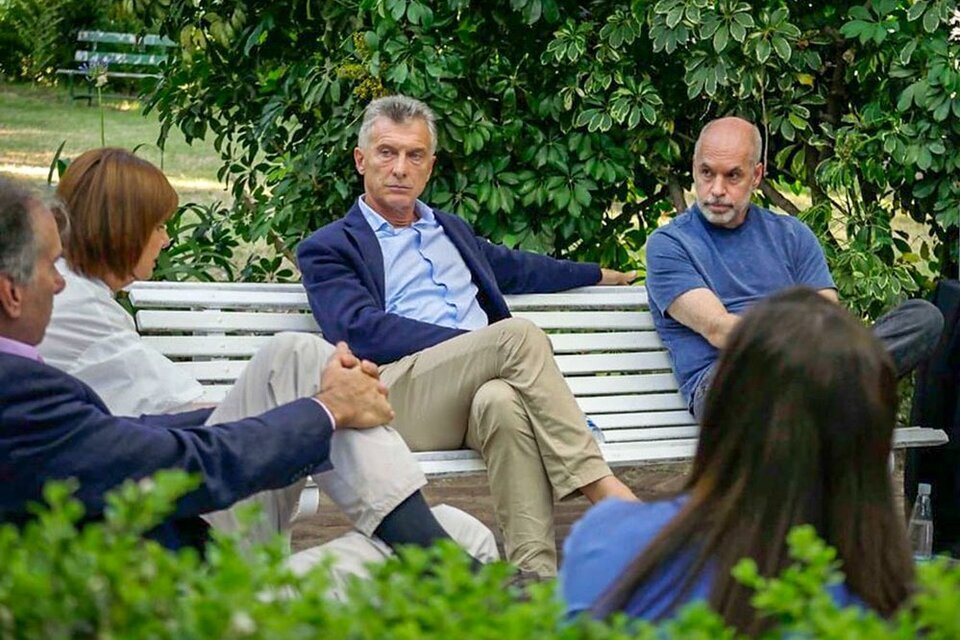

Luego de que Cristina Fernández de Kirchner dijera que en 2023 no va a ser candidata a nada, en Juntos por el Cambio sacaron la calculadora. Hay quienes dicen que esto perjudica a Mauricio Macri en sus intentos reeleccionistas, porque el mejor escenario para él era polarizar con la vicepresidenta y no con otro candidato como podría ser Sergio Massa. Otros suman a esa lista a Patricia Bullrich por idénticas razones. Hay quienes, por el contrario, creen que esto envalentonará a Macri para lanzarse. Y finalmente están los que no le creen que no vaya a ser candidata. De estos, sin pretender tener un censo estricto, hay bastantes: una buena parte sigue pensando que va a tener que competir con ella el año próximo, no importa lo que diga ahora.
El primer análisis vino por parte de los radicales. Interpretaron que el anuncio de CFK no es un gesto definitivo, sino parte de una estrategia para instalar la idea de que la están proscribiendo. Se imaginan un "operativo clamor" que lentamente vaya r

In [167]:
info_notice(url_note)